In [128]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

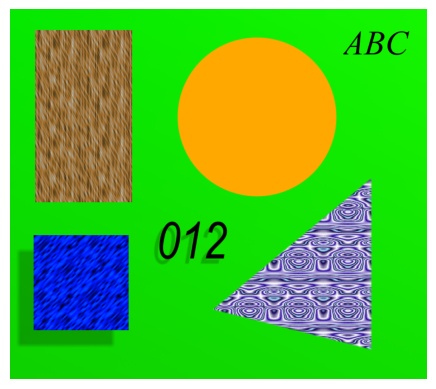

In [129]:
arquivo_nome = 'formas'

img = cv2.imread(f'{arquivo_nome}.bmp')

plt.axis("off")
plt.imshow(img)

# **Criando Mascara da Imagem da Frente**

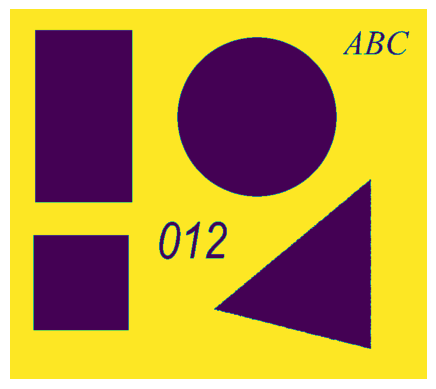

In [130]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (36, 10, 100), (70, 255, 255))

plt.axis("off")
plt.imshow(mask)

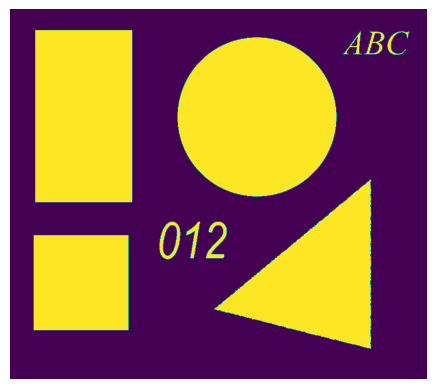

In [131]:
ret, thresh = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1,1), np.uint8)
erosion = cv2.erode(thresh, kernel)

plt.axis("off")
plt.imshow(erosion)

True

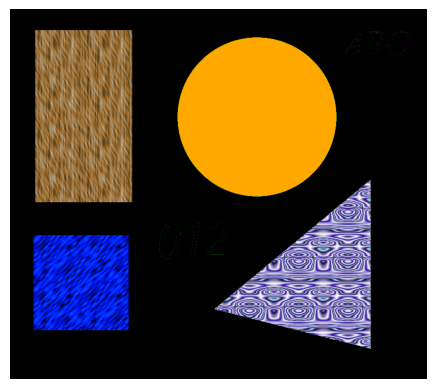

In [132]:
imask = erosion == 255
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

plt.axis("off")
plt.imshow(green)

cv2.imwrite(f'{arquivo_nome}-mascara-frente.bmp', green)

# **Criando Mascara do Background**

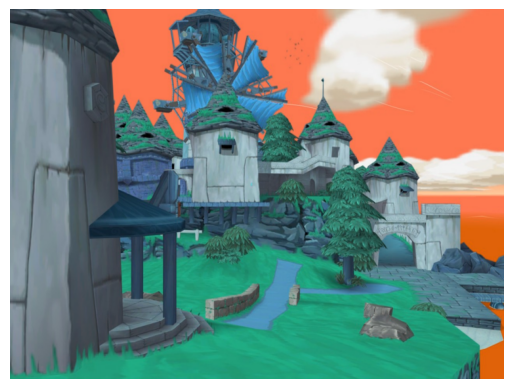

In [133]:
bs = cv2.imread('background.bmp')
bs_resized = cv2.resize(bs, (green.shape[1], green.shape[0]))

plt.axis("off")
plt.imshow(bs)

True

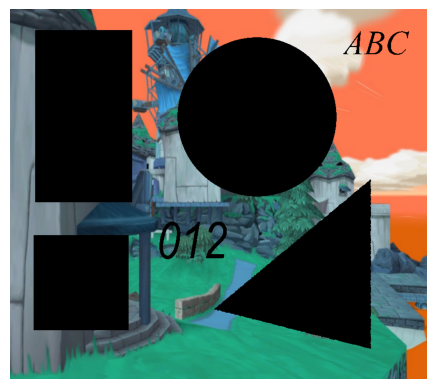

In [134]:
mask_background = cv2.bitwise_not(thresh)
masked_background = cv2.bitwise_and(bs_resized, bs_resized, mask=mask_background)

plt.axis("off")
plt.imshow(masked_background)

cv2.imwrite(f'{arquivo_nome}-mascara-background.bmp', masked_background)

# **Resultado**

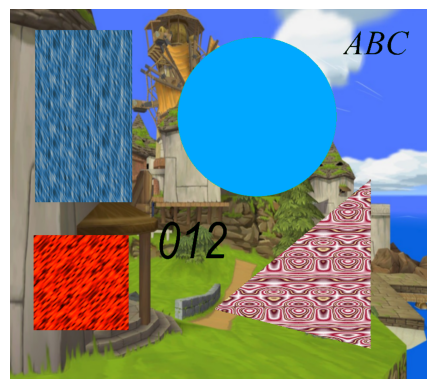

In [135]:
add_result = cv2.add(masked_background, green)
result = cv2.cvtColor(add_result, cv2.COLOR_RGB2BGR)

cv2.imwrite(f'{arquivo_nome}-resultado.bmp', result)

plt.axis("off")
plt.imshow(result)